In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START,END

In [23]:
class AgentState(TypedDict):
    number1:int
    number2:int
    operation:str
    number3:int
    number4:int
    operation2:str
    finalnumber:int
    finalnumber2:int

In [28]:
def adder(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['finalnumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['finalnumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """Decide which operation to perform based on the operation field."""
    if state['operation'] == 'add':
        return 'adder'
    elif state['operation'] == 'subtract':
        return 'subtractor'
    else:
        raise ValueError("Unknown operation")

def adder2(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['finalnumber2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['finalnumber2'] = state['number3'] - state['number4']
    return state

def decide_next_node2(state: AgentState) -> str:
    """Decide which operation to perform based on the operation field."""
    if state['operation2'] == 'add':
        return 'adder2'
    elif state['operation2'] == 'subtract':
        return 'subtractor2'
    else:
        raise ValueError("Unknown operation2")



In [29]:
graph=StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router",lambda state: state)  # This node does nothing, just for routing
graph.add_node("router2",lambda state: state)  # This node does nothing, just for routing

graph.add_edge(START, "router")
graph.add_conditional_edges("router",decide_next_node ,{"adder": "add_node", "subtractor": "subtract_node"})
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges("router2",decide_next_node2 ,{"adder2": "add_node2", "subtractor2": "subtract_node2"})
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app=graph.compile()

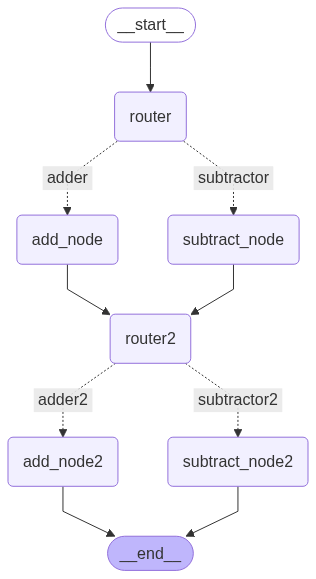

In [30]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))


In [32]:
state1={"number1": 5, "number2": 3, "operation": "add","number3": 10, "number4": 3, "operation2": "subtract"}
print(app.invoke(state1))

{'number1': 5, 'number2': 3, 'operation': 'add', 'number3': 10, 'number4': 3, 'operation2': 'subtract', 'finalnumber': 8, 'finalnumber2': 7}
